In [1]:
# import library
import pandas
import numpy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# assign directory
folder_path = './datasets/'
raw_file_name = 'onuni.FinanceAccounting.csv'
file_path = folder_path + 'preprocessed.' + raw_file_name
# load dataframe
df = pandas.read_csv(file_path, encoding="utf-8", nrows=None, index_col=0)

In [3]:
# view the loaded dataframe
df.head()

,index,id,title,is_paid,num_subscribers,average_rating,rating,num_reviews,num_lectures,num_tests,time_created,time_published,discount,price,discount_percent,rating_deviation
0,0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,6.161458,117.0,5.266204,0.01855
1,1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,6.161458,117.0,5.266204,0.01059
2,2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,6.161458,117.0,5.266204,-0.00165
3,3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,6.161458,117.0,5.266204,-0.00635
4,4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,6.161458,117.0,5.266204,0.00093


In [4]:
# deep copy data for training preditive model
learning_df = df.copy(deep=True).drop(columns='index')

In [5]:
# drop unused columns for training predictive model
drop_col = ['id', 'title','discount_percent', 'rating_deviation',]
learning_df.drop(columns=drop_col, inplace=True)

In [6]:
# drop courses with less subscribers and reviews
learning_df.drop(\
    learning_df[learning_df['num_reviews'] < 100].index,
    inplace=True)

In [7]:
# convert other datatypes to numeric type
file_export_timestamp = pandas.to_datetime('2016-09-27').value // 10**9 //86400

learning_df['is_paid'] = learning_df['is_paid'].astype('int')
learning_df['time_created'] = pandas.to_datetime(
    learning_df['time_created'])\
        .astype('int64') // 86400000000000 - file_export_timestamp
learning_df['time_published'] = pandas.to_datetime(
    learning_df['time_published'])\
        .astype('int64') // 86400000000000 - file_export_timestamp

In [8]:
learning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 13409
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_paid          3117 non-null   int32  
 1   num_subscribers  3117 non-null   int64  
 2   average_rating   3117 non-null   float64
 3   rating           3117 non-null   float64
 4   num_reviews      3117 non-null   int64  
 5   num_lectures     3117 non-null   int64  
 6   num_tests        3117 non-null   int64  
 7   time_created     3117 non-null   int64  
 8   time_published   3117 non-null   int64  
 9   discount         3117 non-null   float64
 10  price            3117 non-null   float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 280.0 KB


In [9]:
learning_df

,is_paid,num_subscribers,average_rating,rating,num_reviews,num_lectures,num_tests,time_created,time_published,discount,price
0,1,295509,4.66019,4.67874,78006,84,0,-226,-174,6.161458,117.0
1,1,209070,4.58956,4.60015,54581,78,0,-36,-35,6.161458,117.0
2,1,155282,4.59491,4.59326,52653,292,2,364,413,6.161458,117.0
3,1,245860,4.54407,4.53772,46447,338,0,-340,-250,6.161458,117.0
4,1,374836,4.47080,4.47173,41630,83,0,-351,-260,6.161458,117.0
...,...,...,...,...,...,...,...,...,...,...,...
13405,0,4168,4.50000,4.44511,111,13,0,1215,1215,0.000000,0.0
13406,0,1372,4.64286,4.72135,107,41,0,875,891,0.000000,0.0
13407,0,2120,4.29630,4.27981,107,23,0,1078,1086,0.000000,0.0
13408,0,4378,4.35000,4.35245,105,14,0,1087,1141,0.000000,0.0


In [10]:
# the model try to preditive rating of courses
# split training and tesing data for model
X = learning_df.drop('rating', axis=1)
Y = learning_df['rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2493, 10) (624, 10) (2493,) (624,)


In [11]:
# Create model and training model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
# use trained model to predicting
Y_predict = model.predict(X_test)

In [13]:
# creade evaluate_df for evaluate predicting data
evaluate_df = pandas.DataFrame(Y_test)
evaluate_df['predict_rating'] = Y_predict
evaluate_df['loss'] = evaluate_df['predict_rating'] - evaluate_df['rating']
evaluate_df[['id','title']] = df[['id','title']]
evaluate_df.reset_index(drop=True, inplace=True)
evaluate_df = evaluate_df[['id', 'title', 'rating', 'predict_rating', 'loss']]
evaluate_df.head()

,id,title,rating,predict_rating,loss
0,1723480,Real Estate Financial Modeling - The Complete ...,4.39341,4.289822,-0.103588
1,677348,Supply Chain Fundamentals: Understanding the ...,4.41710,4.427235,0.010135
2,831940,Accounting for Beginners: Financial Accounting...,4.27845,4.293376,0.014926
3,228668,Amazon FBA Beginners Course - Start Earning In...,4.32313,4.315689,-0.007441
4,87634,How to Become a Transcriptionist,4.40509,4.396982,-0.008108


In [14]:
# Fomulas: y = a + a0.x0 + a0.x1 + ... + a10.x10
# print model intercept or a
print(model.intercept_)

0.07395103356217003


In [15]:
# print linear regression coefficients or a0, a2,..., a10
coef = pandas.DataFrame({'Weight of Column': X.columns.to_list(), \
    'Coefficient': model.coef_.tolist()})
pandas.options.display.float_format = '{:.20f}'.format
coef

,Weight of Column,Coefficient
0,is_paid,-0.03920701570177988204
1,num_subscribers,0.00000009511094681358
2,average_rating,0.99031674345695464012
3,num_reviews,0.00000070923429409606
4,num_lectures,0.00004021222877413914
5,num_tests,-0.00639402353375598774
6,time_created,-0.00000110715876129115
7,time_published,0.00000322832427829807
8,discount,-0.00006203090438033580
9,price,-0.00003562014511803521


<AxesSubplot:>

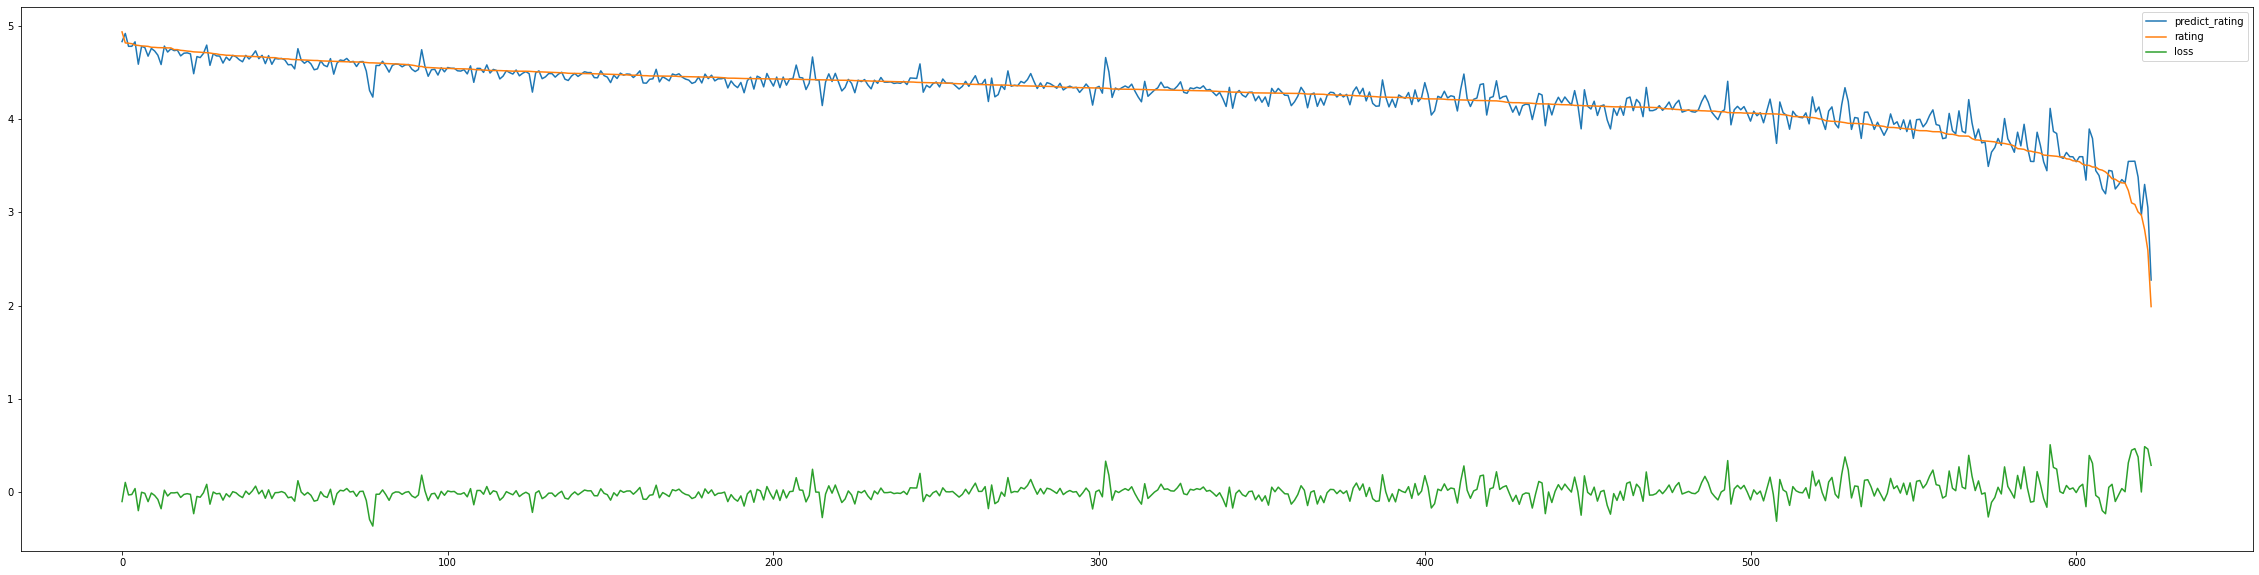

In [16]:
# show line chart about predict_rating and real rating
evaluate_df\
    .sort_values(by='rating', ascending=False)\
    .reset_index(drop=True)\
    .plot(y=['predict_rating', 'rating', 'loss'], figsize=(40,10))

<AxesSubplot:ylabel='Frequency'>

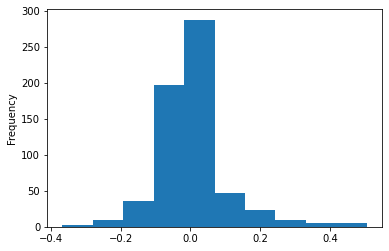

In [17]:
# show histogram about the loss
evaluate_df['loss'].plot(kind='hist')

In [18]:
Y_test

2385    4.39341000000000025949
110     4.41709999999999958220
1077    4.27845000000000030838
620     4.32312999999999991729
340     4.40509000000000039421
                 ...          
11912   4.64900000000000002132
11826   4.13198000000000043030
2082    4.67886000000000024102
757     4.01804999999999967741
1513    4.33290000000000041780
Name: rating, Length: 624, dtype: float64

In [19]:
model.score(X_test, Y_test)

0.9085170752161469

In [20]:
# show prediting error
mse = mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error:          ', mse)
print('Root Mean Squared Error:     ', numpy.sqrt(mse))

Mean Squared Error:           0.010431738469110075
Root Mean Squared Error:      0.10213588237788948


In [21]:
# show statistic of the loss
evaluate_df['loss'].describe()

count   624.00000000000000000000
mean      0.00306397994236532346
std       0.10217181504974356954
min      -0.36741454429477471422
25%      -0.04162971797760062209
50%      -0.00316439953660507811
75%       0.03336909385070985223
max       0.50600831980190719150
Name: loss, dtype: float64

In [22]:
# export training data
file_path = folder_path + 'learning.' + raw_file_name
learning_df.to_csv(file_path)

# export evaluating data
file_path = folder_path + 'evaluating.' + raw_file_name
evaluate_df.to_csv(file_path)